### Imports

In [37]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data_preparation import get_financial_data
from data_preparation import compute_ratios


os.chdir(sys.path[0])

Data loading

In [38]:
path = "../Bloomberg_data_processing/"
filename = "preprocessed_russell_3k_data_14-03-22.csv"

data = pd.read_csv(path + filename)

companies = data[["Ticker", "IND_GICS", "SUB_IND_GICS", "REGION_NAME"]].copy()

In [39]:
companies["SUB_IND_GICS"].describe()

count              3037
unique              153
top       Biotechnology
freq                316
Name: SUB_IND_GICS, dtype: object

In [40]:
#remove non biotech and non us companies
companies = companies.loc[companies["SUB_IND_GICS"] == "Biotechnology"]
print(f"Number of companies in biotech : {len(companies)}")
companies = companies.loc[companies["REGION_NAME"] == "United States"]
print(f"Number of companies in biotech and in the us : {len(companies)}")

Number of companies in biotech : 316
Number of companies in biotech and in the us : 311


In [41]:
companies_data = get_financial_data(companies["Ticker"].values.tolist())

In [42]:
print("Number of missing values per column :\n")
print(companies_data.isnull().sum())

Number of missing values per column :

Ticker             0
CUR_MKT_CAP        0
CURR_ENTP_VAL      0
EBIT               2
EBITDA            11
GROSS_PROFIT     122
PE_RATIO         281
dtype: int64


In [43]:
companies_data.head(5)

,Ticker,CUR_MKT_CAP,CURR_ENTP_VAL,EBIT,EBITDA,GROSS_PROFIT,PE_RATIO
1,INO,688081403.4,319.789847,-301.217919,-294.257408,NaN,NaN
27,BCEL,112898803.0,-4.130197,-110.303000,-105.753000,0.0,NaN
29,IMUX,287720572.0,201.898572,-91.665000,-91.077000,0.0,NaN
32,AKRO,483528632.4,296.581632,-100.886000,-100.521000,0.0,NaN
57,PSTX,228921650.3,83.794650,-141.411000,-136.859000,NaN,NaN


In [44]:
companies_data.describe()

,CUR_MKT_CAP,CURR_ENTP_VAL,EBIT,EBITDA,GROSS_PROFIT,PE_RATIO
count,3.110000e+02,311.000000,309.000000,300.000000,189.000000,30.000000
mean,3.485259e+09,3532.343622,96.945584,167.071034,804.387912,94.413820
std,1.862734e+10,22421.311222,1572.940294,2071.797487,3846.235457,371.659191
min,1.947602e+07,-278.104945,-1686.576000,-1636.888000,-35.195000,3.588179
25%,1.853649e+08,61.688070,-150.025000,-140.682250,0.000000,9.669121
50%,4.673576e+08,276.224399,-74.186000,-68.931000,1.274000,18.543635
75%,1.242737e+09,887.895769,-33.886069,-32.070500,149.906000,28.691158
max,2.696820e+11,337454.896300,17924.000000,26671.000000,38751.000000,2056.238251


In [45]:
companies_data = compute_ratios(companies_data)
companies_data = companies_data.set_index("Ticker")

In [46]:
companies_data.head(3)

,CUR_MKT_CAP,CURR_ENTP_VAL,EBIT,EBITDA,GROSS_PROFIT,PE_RATIO,EV_EBIT_ratio,EV_EBITDA_ratio,EV_GROSS_PROFIT_ratio
Ticker,,,,,,,,,
INO,688081403.4,319.789847,-301.217919,-294.257408,NaN,NaN,-1.061656,-1.086769,NaN
BCEL,112898803.0,-4.130197,-110.303000,-105.753000,0.0,NaN,0.037444,0.039055,-inf
IMUX,287720572.0,201.898572,-91.665000,-91.077000,0.0,NaN,-2.202570,-2.216790,inf


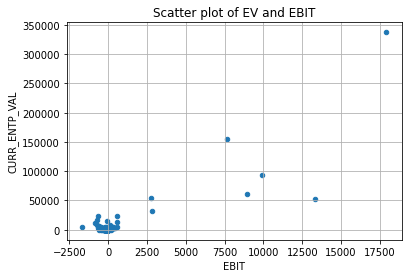

In [57]:
#Scatter plot
stat = "EBIT"
ax = companies_data.plot.scatter(stat, "CURR_ENTP_VAL", title=f"Scatter plot of EV and {stat}")
# plt.axis([-500, 200, -400, 5000])
plt.grid()
# Annotate each data point
# for i, txt in enumerate(companies_data.index):
#    ax.annotate(txt, (companies_data[stat].iat[i]+0.05, companies_data["CURR_ENTP_VAL"].iat[i]))

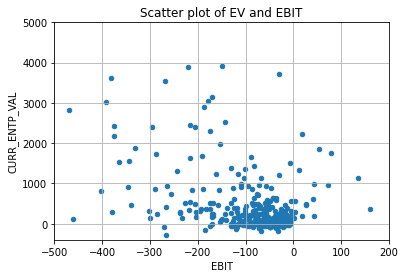

In [58]:
#Scatter plot
stat = "EBIT"
ax = companies_data.plot.scatter(stat, "CURR_ENTP_VAL", title=f"Scatter plot of EV and {stat}")
plt.axis([-500, 200, -400, 5000])
plt.grid()
# Annotate each data point
# for i, txt in enumerate(companies_data.index):
#    ax.annotate(txt, (companies_data[stat].iat[i]+0.05, companies_data["CURR_ENTP_VAL"].iat[i]))

In [61]:
#calcul des moyennes
print("\nAverages :")
averages = companies_data.mean(axis=0)
print(averages)
print("\nMedians :")
medians = companies_data.median(axis=0)
print(medians)


Averages :
CUR_MKT_CAP              3.485259e+09
CURR_ENTP_VAL            3.532344e+03
EBIT                     9.694558e+01
EBITDA                   1.670710e+02
GROSS_PROFIT             8.043879e+02
PE_RATIO                 9.441382e+01
EV_EBIT_ratio           -3.038899e+00
EV_EBITDA_ratio         -1.771040e-01
EV_GROSS_PROFIT_ratio             NaN
dtype: float64

Medians :
CUR_MKT_CAP              4.673576e+08
CURR_ENTP_VAL            2.762244e+02
EBIT                    -7.418600e+01
EBITDA                  -6.893100e+01
GROSS_PROFIT             1.274000e+00
PE_RATIO                 1.854364e+01
EV_EBIT_ratio           -2.034123e+00
EV_EBITDA_ratio         -2.199924e+00
EV_GROSS_PROFIT_ratio    9.885580e+00
dtype: float64


## Brouillon - vieux code

In [48]:
path = "../Bloomberg_data_processing/"
filename = "preprocessed_russell_3k_data_14-03-22.csv"

data = pd.read_csv(path + filename)

companies_relevant_data = data[["Ticker", "IND_GICS", "SUB_IND_GICS", "CUR_MKT_CAP", "REGION_NAME", "NUM_OF_EMPLOYEES", "SUSTAIN_GROWTH_RT"]].copy()

#remove non biotech and non us companies
companies_relevant_data = companies_relevant_data.loc[companies_relevant_data["SUB_IND_GICS"] == "Biotechnology"]
print(f"Number of companies in biotech : {len(companies_relevant_data)}")
companies_relevant_data = companies_relevant_data.loc[companies_relevant_data["REGION_NAME"] == "United States"]
print(f"Number of companies in biotech and in the us : {len(companies_relevant_data)}")

Number of companies in biotech : 316
Number of companies in biotech and in the us : 311


Distribution vizualisation

In [49]:
# # sector_subset = companies_relevant_info.loc[companies_relevant_info["SUB_IND_GICS"] == "Application Software"]
# sector_subset = companies_relevant_data.copy()
# print(f"Number of companies before filtering : {len(sector_subset)}")
# sector_subset = sector_subset.loc[sector_subset["CUR_MKT_CAP"] < 1.5e+9]
# print(f"Number of companies after filtering : {len(sector_subset)}")
# print(sector_subset.describe())
# plt.figure(figsize=(15,7))
# plt.hist(sector_subset["CUR_MKT_CAP"], bins=30)
# plt.title("CUR_MKT_CAP distribution")
# plt.grid()

In [50]:
# sector_subset = companies_relevant_data.copy()
# print(f"Number of companies before filtering : {len(sector_subset)}")
# sector_subset = sector_subset.loc[sector_subset["CUR_MKT_CAP"] <  1.5e+9]
# sector_subset = sector_subset.loc[sector_subset["NUM_OF_EMPLOYEES"] < 700]
# print(f"Number of companies after filtering : {len(sector_subset)}")
# print(sector_subset.describe())
# plt.figure(figsize=(15,7))
# plt.hist(sector_subset["NUM_OF_EMPLOYEES"], bins=40)
# plt.title("NUM_OF_EMPLOYEES distribution")
# plt.grid()

In [51]:
# sector_subset = companies_relevant_data.copy()
# print(f"Number of companies before filtering : {len(sector_subset)}")
# sector_subset = sector_subset.loc[sector_subset["CUR_MKT_CAP"] <  1.5e+9]
# sector_subset = sector_subset.loc[sector_subset["NUM_OF_EMPLOYEES"] < 3000]
# # sector_subset = sector_subset.loc[abs(sector_subset["SUSTAIN_GROWTH_RT"]) < 50]
# print(f"Number of companies after filtering : {len(sector_subset)}")
# print(sector_subset.describe())
# plt.figure(figsize=(7,4))
# plt.hist(sector_subset["SUSTAIN_GROWTH_RT"], bins=40)
# plt.title("SUSTAIN_GROWTH_RT distribution")
# plt.grid()

Comment on sustained growth rate : this data is not often provided

Definition of the aimed groud of study's details

In [52]:
# aimed_group = dict.fromkeys(companies_relevant_data.columns)
# aimed_group["IND_GICS"] = "Health Care"
# aimed_group["SUB_IND_GICS"] = "Biotechnology"
# aimed_group["REGION_NAME"] = "United States"
# aimed_group["CUR_MKT_CAP"] = 0.4e+9
# aimed_group["NUM_OF_EMPLOYEES"] = 130

In [53]:
# aimed_group_df = pd.DataFrame(columns=companies_relevant_data.columns)
# aimed_group_df = aimed_group_df.append(aimed_group, ignore_index=True)
# aimed_group_df

List of companies ranked by similarity with these targets :